In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score,train_test_split


In [55]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [56]:
data.shape

(205, 26)

In [57]:
num = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}
data['cylindernumber'] = [num[i] for i in data['cylindernumber']]
data['doornumber'] = [num[i] for i in data['doornumber']] 
data['CarName']=[name[0] for name in data['CarName'].str.split(' ')]
data['CarName'] = data['CarName'].replace('toyouta','toyota')
data['CarName'] = data['CarName'].replace('maxda','mazda')
data['CarName'] = data['CarName'].replace('vw','volkswagen')
data['CarName'] = data['CarName'].replace('porcshce','porsche')
data['CarName'] = data['CarName'].replace('Nissan','nissan')
data['CarName'] = data['CarName'].replace('vokswagen','volkswagen')
#data['drivewheel'].replace("4wd","fwd",inplace=True)

In [58]:
print(data.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


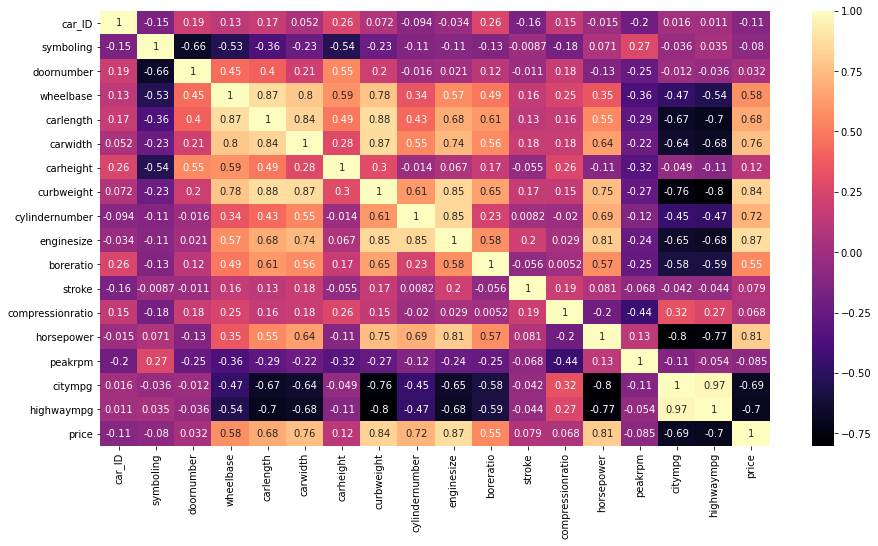

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap=plt.cm.magma,annot=True)
plt.show()

In [60]:
data = pd.get_dummies(data,columns =['fueltype','enginelocation','aspiration','drivewheel','carbody','fuelsystem','enginetype','CarName'],drop_first=True)

In [61]:
X = data.drop(['price'],axis=1)
Y=data['price']

In [62]:
Scaling_columns =['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
scaling_features = X[Scaling_columns]
scale = StandardScaler().fit(scaling_features.values)
scaling_features = scale.transform(scaling_features.values)
X[Scaling_columns] = scaling_features

In [63]:
X

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo
0,1,3,2,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,4,0.074449,...,0,0,0,0,0,0,0,0,0,0
1,2,3,2,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,4,0.074449,...,0,0,0,0,0,0,0,0,0,0
2,3,1,2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,6,0.604046,...,0,0,0,0,0,0,0,0,0,0
3,4,2,4,0.173698,0.207256,0.136542,0.235942,-0.420797,4,-0.431076,...,0,0,0,0,0,0,0,0,0,0
4,5,2,4,0.107110,0.207256,0.230001,0.235942,0.516807,5,0.218885,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,4,1.721873,1.198549,1.398245,0.728239,0.763241,4,0.339248,...,0,0,0,0,0,0,0,0,0,1
201,202,-1,4,1.721873,1.198549,1.351515,0.728239,0.949992,4,0.339248,...,0,0,0,0,0,0,0,0,0,1
202,203,-1,4,1.721873,1.198549,1.398245,0.728239,0.878757,6,1.109571,...,0,0,0,0,0,0,0,0,0,1
203,204,-1,4,1.721873,1.198549,1.398245,0.728239,1.273437,6,0.435538,...,0,0,0,0,0,0,0,0,0,1


# PLOT

In [100]:


def Train_Test(model,X,Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state =1)
    model.fit(X_train,Y_train)
    Y_predict = model.predict(X_test)
    #print(model.coef_)
    #print(f"Intercept : {model.intercept_}")
    print(f"Score : {model.score(X_test,Y_test)}")
    MSE = (mean_squared_error(Y_test,Y_predict))/(max(Y)-min(Y))
    MAE = (mean_absolute_error(Y_test,Y_predict))/(max(Y)-min(Y))
    MAPE = np.mean(np.abs((Y_test - Y_predict)/Y_test))*100
    RMSE = np.sqrt(mean_absolute_error(Y_test,Y_predict))
    R2 = r2_score(Y_test,Y_predict)
    (n,k) = X.shape
    adj_r2_score = 1 - ((1-R2)*(n-1)/(n-k))
    print(f"----------------------------------------------------------------------------\n\n\t\t\t Train Test \n\n----------------------------------------------------------------------------")

    
    print(f"MSE of   {model} --------> {MSE.round(4)}")
    print(f"MAE of   {model} --------> {MAE.round(4)}")
    print(f"MAPE of  {model} --------> {MAPE}")
    print(f"RMSE of  {model} --------> {RMSE.round(4)}")
    print(f"R2 of    {model} --------> {R2.round(4)}")
    print(f"AdjR2 of {model} --------> {adj_r2_score.round(4)}")
    
    
        
def fit_KF(model,X,Y):
    kf = KFold(n_splits=10,shuffle=True,random_state=1)
    #using K-fold
    acc_KFold= cross_val_score(model,X,Y,cv=kf,scoring='neg_mean_absolute_error' )
    print(f"----------------------------------------------------------------------------\n\n\t\t\t KFold \n\n----------------------------------------------------------------------------")
    MAE = abs(acc_KFold.mean()*100)/(max(Y)-min(Y))
    print(f"MAE using KFold for {model} : {MAE} \n")


def fit_SKF(model,X,Y):
    skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
    print(f"----------------------------------------------------------------------------\n\n\t\t\t Stratified KFold\n\n----------------------------------------------------------------------------")
    acc_SKFold = cross_val_score(model,X,Y,cv=skf,scoring='neg_mean_absolute_error' )
    print(f"Accuracy using Stratified KFold {model} : {acc_SKFold.mean()*100} \n")

          


In [101]:
linear = LinearRegression()
Train_Test(linear,X,Y)
#fit_SKF(linear,X,Y)
fit_KF(linear,X,Y)



Score : 0.8846940780857372
----------------------------------------------------------------------------

			 Train Test 

----------------------------------------------------------------------------
MSE of   LinearRegression() --------> 172.8089
MAE of   LinearRegression() --------> 0.0425
MAPE of  LinearRegression() --------> 15.155931242093267
RMSE of  LinearRegression() --------> 41.3681
R2 of    LinearRegression() --------> 0.8847
AdjR2 of LinearRegression() --------> 0.8378
----------------------------------------------------------------------------

			 KFold 

----------------------------------------------------------------------------
MAE using KFold for LinearRegression() : 4.641432660306051 



In [102]:
DeTree = DecisionTreeRegressor()
fit_KF(DeTree,X,Y)
Train_Test(DeTree,X,Y)

RandForest = RandomForestRegressor(n_estimators=500)
fit_KF(RandForest,X,Y)

Train_Test(RandForest,X,Y)

----------------------------------------------------------------------------

			 KFold 

----------------------------------------------------------------------------
MAE using KFold for DecisionTreeRegressor() : 4.167922405375437 

Score : 0.8918453479662778
----------------------------------------------------------------------------

			 Train Test 

----------------------------------------------------------------------------
MSE of   DecisionTreeRegressor() --------> 162.0913
MAE of   DecisionTreeRegressor() --------> 0.04
MAPE of  DecisionTreeRegressor() --------> 12.555933125447586
RMSE of  DecisionTreeRegressor() --------> 40.1204
R2 of    DecisionTreeRegressor() --------> 0.8918
AdjR2 of DecisionTreeRegressor() --------> 0.8478
----------------------------------------------------------------------------

			 KFold 

----------------------------------------------------------------------------
MAE using KFold for RandomForestRegressor(n_estimators=500) : 3.376467212148401 

Score 